#### 26. Ciclos Reciprocos

Encontrar el numero d<1000 tal que 1/d tiene la expansion en decimales con ciclo mas largo 

In [49]:
#Libreria para este tipo de cosas
import decimal
#le decimos que siempre calcule las cosas con 500 decimales para asegurarnos
decimal.getcontext().prec = 1000

#funcion que encuentra la longitud del periodo de una expansion decimal

def longitud(n):
    # si es un decimal que no se acaba
    if len(n) > 999:
        # tomamos un a que sea un substring desde la posicion 12 a la 20
        # no empezamos en la primera porque puede empezar con 0s que no se 
        # repiten (un maximo de 3 ceros va a haber, pero ponemos 12 alv)
        a = n[12:20]
        i = 13
        #vamos iterando
        while i:
            # vemos si la siguiente substring de 8 elementos de n es igual 
            # a la primera
            if n[i:i+8]==a:
                # si la encontramos, ya tenemos la longitud del periodo
                return(i-12)
            i = i+1
    return(0)


'''
division = decimal.Decimal(1) / decimal.Decimal(983)
print(division)
print(longitud(str(division)))
'''
maxx = 0

for j in range(1,1000):
    division = decimal.Decimal(1) / decimal.Decimal(j)
    contendiente= longitud(str(division))
    if contendiente > maxx:
        maxx = contendiente
        ind = j
print("longitud:", maxx)
print("maximo:", ind)

longitud: 982
maximo: 983


#### 27. quadratic primes
Las expresiones del tipo n^2 + an + b pueden generar varios primos para distintos valores de a y de b. Buscamos la formula de este tipo que genere la mayor cantidad de primos antes de dejar de generarlos para -1000<a<1000 , -1000<b<1000

In [84]:
import numpy as np

#usamos una funcion isPrime
def isPrime(n):
    if n < 0:
        return(False)
    
    if n==1:
        return(False)
    elif n % 2 == 0:
        return(False)
    elif n<9:
        return(True)
    elif n % 3 == 0:
        return(False)
    else:
        r = np.floor(np.sqrt(n))
        f = 5
        while f <= r:
            if n % f == 0:
                return(False)
            if n % (f+2) == 0:
                return(False)
            f=f+6
        
    
    return(True)
''' Usamos que los primos mayores que 3 se ven como 6k +- 1'''    

#definimos la funcion de aplicar n**2 + an  + b
def aplicar(a,b,n):
    return(int(n**2 + a*n + b))

def longitud(a,b,maxx):
    ''' funcion que da la cantidad de primos consecutivos 
    usando n**2 + an + b para n=0,1,....
    solo da la cantidad de primos si son mas que el maxx actual
    sino, no vale la pena y da 0'''
    n=0
    #Si b no es primo, para n=0 no va a haber primos y listo
    if isPrime(b) == False:
        return(0)
    # en este caso, al evaluar en n=1 nos da un negativo
    if a<0 and -a > b:
        return(0)
    # para que al evaluar en 1 sea un primo
    if isPrime(1+a+b) == False:
        return(0)
    
    # solo nos interesan las cadenas que sean mas largas que max
    # por lo que vemos en distintos valores menores a maxx a ver si hay primos
    # si no hay, es porque no llega ni a eso
    if isPrime(aplicar(a,b,int(np.floor(maxx/10)))) == False:
        return(0)
    elif isPrime(aplicar(a,b,int(np.floor(maxx/2)))) == False:
        return(0)
    elif isPrime(aplicar(a,b,int(np.floor(maxx)))) == False:
        return(0)
    
    #si los anteriores fueron primos, quiza esta nueva cadena sea mejor
    # entonces la contabilizamos
    while isPrime(aplicar(a,b,n)) == True:
        n = n+1
    return(n)
    
# maximo a vencer por ahora
maxac = 41


#vamos iterando y guardando los mejores
for a in range(-1000,1001):
    for b in range(-1000,1001):
        if longitud(a,b,maxac) > maxac:
            maxac = longitud(a,b,maxac)
            meja = a
            mejb = b
print(maxac)
print(meja)
print(mejb)
    
    

71
-61
971


##### 28. Number spiral diagonals

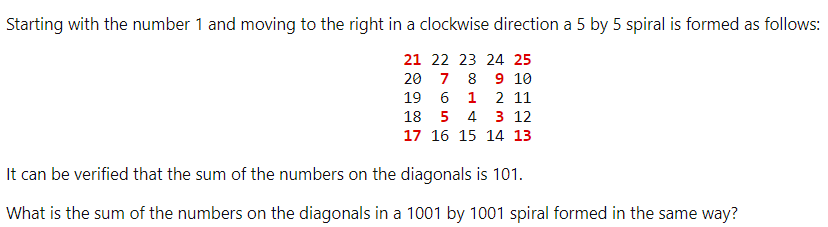

In [94]:
# Para hacer una espiral de 1001 por 1001 necesitaremos llegar hasta los numeros
# 1001*1001 (tal como aqui se requirio llegar a 5*5 = 25 o como se llega 
# a 9 en la tabla)

# primero los numeros rojos van de dos en dos, luego se saltan de 4 en cuatro
# y luego ser'a de 6 en 6, ....
# de hecho, es facil ver que la diagonal sup der son cuadrados de los impares
# es decir, de la forma (2n+1)^2 = 4n^2 + 4n + 1 con n=0,1,...,500

# la inferior derecha son de la forma 4n^2-2n+1 con n=0,1,...,500
# la superior izquierda son de la forma 4n^2 + 2n +1 con n=0,1,..,500
# la inferior izquierda son de la forma 4n^2 +1 con n = 0,1,...,500
#todo esto se puede probar por induccion

suma = 1
for i in range(1,501):
    #suma = suma + (2*i+1)**2 + 4*i**2 - 2*i + 1 + 4*i**2 + 2*i + 1 + 4*i**2 + 1
    suma = suma + 16*i**2 + 4*i + 4
    
print(suma)




669171001


#### 29.  Potencias distintas

Cuantos numeros distintos de la forma a^b para 2<= a <= 100 y 2<= b <= 100 hay

In [137]:
# todas las potencias primas son unicas. 
# los numeros que pueden causar problemas son los que tienen una expresion en 
# factores primos igual a alguno numero que ya hayamos considerado pero 
# con todo al cuadrado (o al cubo o etc)
# es decir, los cuadrados, los cubos, etc


# contar cuantos numeros a hemos ya considerado para 2 <= a <= 100

contador = 0

#suma de todos los numeros a^b distintos
suma = 0

'''
# hay una a que es 6ta potencia (64) 
# para 64, las primeras 15 potencias 64^2,...64^16
#ya estan consideradas en el 2. Por lo que tenemos solo 84 potencias distintas
contador = 1
suma = suma + 84
'''


# hay una potencia quinta (32 = 2^5). 
# por lo que sus primeros 19 no contribuyen 32^2 ,... 32^20
# solo quedan 80
contador=1
suma = suma + 80
'''
# hay dos potencias cuartas 2^4 , 3^4. Para las cuales no contribuyen las 
# potencias con b = 2, ... b = 25 y quedan solo 75
contador = contador +2
suma  = suma + 2*75
'''

# hay 2 potencias cubicas 2^3=8, 3^3=27. Para las cuales no contribuyen las 
# potencias con b = 2, ... b = 33 y quedan solo 66
contador = contador +2
suma  = suma + 2*66

# hay 9 potencias cuadradas 4,9,16,25,36,49,64,81,100
# cada una de estas tiene solo 50 terminos verdaderamente unicos
contador = contador + 9
suma = suma + 9*50

    
#quedan 
restan = 99  - contador
#cada uno de estos restantes tiene todas sus potencias
suma = suma + 100*restan
    
print(suma)
# algo esto contando doble ptm.

''' solucion con bruta'''

from itertools import product


def solve():
    """ Compute the answer to Project Euler's problem #29 """
    upper_bound = 100
    terms = set()
    for a, b in product(range(2, upper_bound + 1), repeat=2):
        terms.add(a ** b)
    answer = len(terms)
    return answer

print(solve())

9362
9183


#### 30. Quintas potencias
Encuentra la suma de todos los numeros que se pueden escribir como la suma de las 5tas potencias de sus digitos

In [121]:

def checar(n):
    sn = str(n)
    suma = 0
    for i in sn:
        suma = suma+ int(i)**5
    if suma == n:
        return(True)
    else:
        return(False)
    
print(checar(8208))

res =[]
for i in range(1000000):
    if checar(i)==True:
        res.append(i)
        
print(res)
print(sum(res))

False
[0, 1, 4150, 4151, 54748, 92727, 93084, 194979]
443840
